In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib.colors import ListedColormap

# Truncated inferno (avoid yellows)
original_cmap = colormaps.get_cmap('inferno')
new_cmap = original_cmap(np.linspace(0,0.85, 256))
inferno_trunc = ListedColormap(new_cmap)

In [4]:
cases = ['tjet_Le1B_LGHE', 'tjet_Le1B_HGLE', 'tjet_Le1B_HGHE']
labels = ['LGHE', 'HGLE', 'HGHE']

# Results Section

## ODT Cases Side-by-side Contour Plots

In [5]:
arr = np.arange(0,10)
arr.take(range(3,2), mode='wrap')

array([], dtype=int32)

In [18]:
def contour_sbs(phi='T', units='K'):
    plt.rcParams.update({'font.size': 14})
    fig=plt.figure(figsize=(8,6))

    # Determine which case has the highest phi value
    max_i = None
    max_value = -np.inf
    for i, case in enumerate(cases):
        odtdata = np.loadtxt(f'{case}/{phi}_ODT.txt')
        max_case_value = np.max(odtdata)
        if max_case_value > max_value:
            max_value = max_case_value
            max_i = i
    
    # Load data
    levels = None
    for j in range(len(cases)):
        i = (j + max_i) % len(cases)
        case = cases[i]
        ODT_xs = np.loadtxt(f'{case}/xVals.txt')
        ODT_ts = np.loadtxt(f'{case}/tVals.txt')
        odtdata = np.loadtxt(f'{case}/{phi}_ODT.txt')

        xx, tt = np.meshgrid(ODT_xs, ODT_ts[:39])
        ax = plt.subplot(1, len(cases), i+1)
        ax.set_title(labels[i])
        ax.set_xlabel('x (m)')
        
        if j == 0:
            # Set levels on using the first plot (global max phi)
            contour = ax.contourf(xx,tt,odtdata.T, 100, cmap='inferno')
            levels = contour.levels
        else:
            # Base other plots' levels on the first plot
            contour = ax.contourf(xx,tt,odtdata.T, levels, cmap='inferno')
        contour.set_edgecolor("face")
        if i == 0:
            # Set y-axis ticks and labels for the first plot
            ax.set_ylabel('t (s)')
        else:
            # Remove y-axis ticks and labels for other plots
            ax.set_yticks([])
            ax.set_yticklabels([])

    plt.tight_layout()
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.82, 0.13, 0.05, 0.7])
    cbar = fig.colorbar(contour, cax=cbar_ax)
    cbar.set_label(f'{phi} ({units})', rotation=270, labelpad=20)
    plt.savefig(f"{phi}_contour_sbs.pdf")
    plt.show();

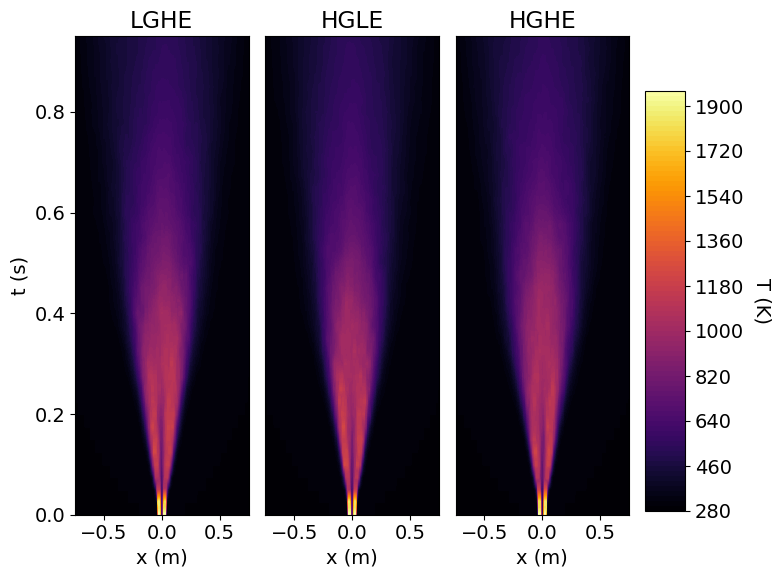

In [19]:
contour_sbs('T', 'K')

## ODT Scatter in Mixture Fraction Space

In [54]:
def scatter_sbs(phi='T', units='K', xax = 'Z'):
    plt.rcParams.update({'font.size': 14})
    fig, axs = plt.subplots(len(cases), 1, sharex=True, figsize=(6,9))

    # Determine which case has the highest phi value
    max_i = None
    max_value = -np.inf
    min_value = np.inf
    for i, case in enumerate(cases):
        odtdata = np.loadtxt(f'{case}/{phi}_ODT.txt')
        max_case_value = np.max(odtdata)
        min_case_value = np.min(odtdata)
        if max_case_value > max_value:
            max_value = max_case_value
            max_i = i
        if min_case_value < min_value:
            min_value = min_case_value
    
    for j in range(len(cases)):
        case = cases[j]
        odtdata = np.loadtxt(f'{case}/{phi}_ODT.txt').flatten()
        mixfs = np.loadtxt(f"{case}/fmeans_mixf.dat")[:,1:].flatten()
        xs = np.loadtxt(f'{case}/xVals.txt').flatten()
        ts = np.loadtxt(f'{case}/tVals.txt').flatten()
        xs = np.repeat(xs, len(ts)-1)

        ax = axs[j]
        if xax.lower() == 'z':
            ax.scatter(mixfs, odtdata, cmap = inferno_trunc, c = odtdata-1000, s = 0.2)
        elif xax.lower() == 'x':
            ax.scatter(xs, odtdata, cmap = inferno_trunc, c = odtdata-1000, s = 0.2)

        # Use legend to show the case name
        ax.scatter([], [], c='w', label=labels[j], s=0.2)
        ax.legend(loc='upper right', frameon=False)
        ax.set_ylabel(f'{phi} ({units})')
        ax.set_ylim(min_value*0.9, max_value*1.1)

        if j == len(cases) - 1:
            # Set x-axis ticks and labels for the bottom plot
            ax.set_xlabel('Z')
            if xax.lower() == 'z':
                ax.set_xlabel('Z')
            elif xax.lower() == 'x':
                ax.set_xlabel('X (m)')
            
    plt.subplots_adjust(hspace=.0)
    #plt.tight_layout()
    plt.savefig(f"{phi}_scatters_sbs_{xax}space.pdf", dpi=300, bbox_inches='tight')
    plt.show()

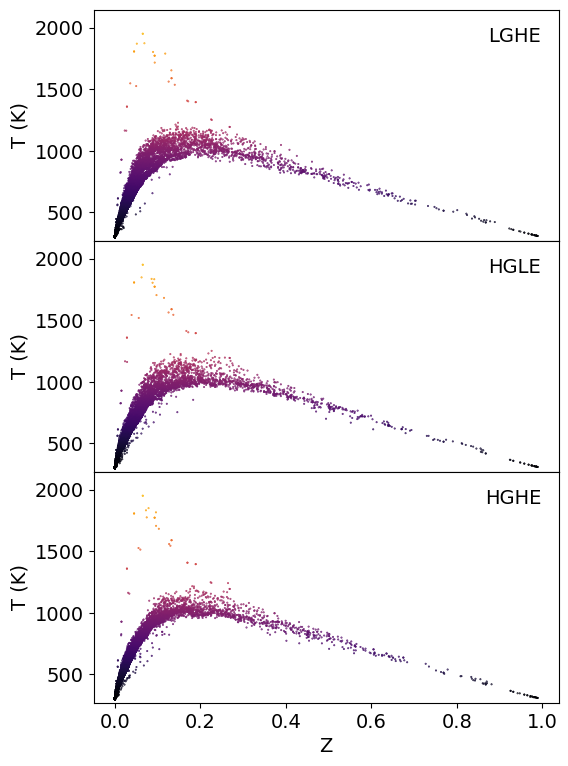

In [ ]:
scatter_sbs('T', 'K', xax='Z')

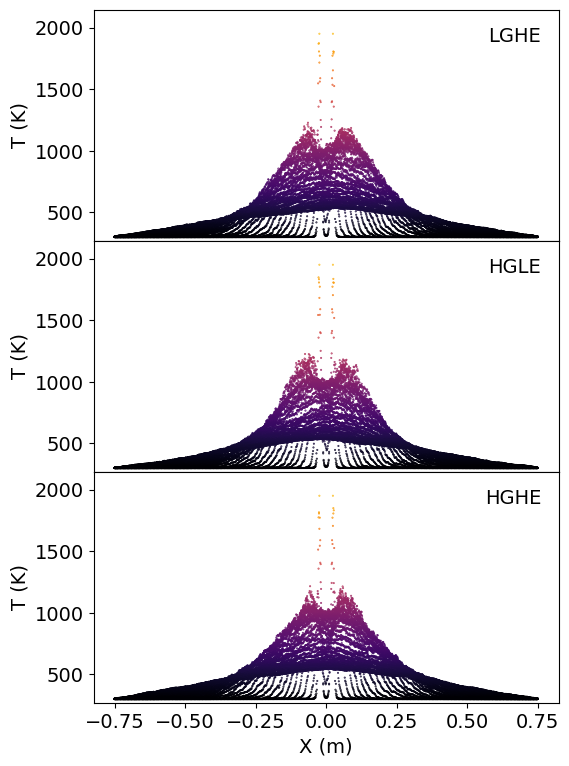

In [55]:
scatter_sbs('T', 'K', xax='X')